In [3]:
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data=data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(10)

,Annual Income (k$),Spending Score (1-100)
160,79,35
99,61,49
71,49,42
69,48,47
50,42,52
94,60,42
56,44,50
177,88,69
34,33,14
158,78,1


In [6]:
#rename columns
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})
data.sample(5)

,Income,Score
174,88,13
158,78,1
79,54,42
105,62,42
171,87,75


Text(0, 0.5, 'Score')

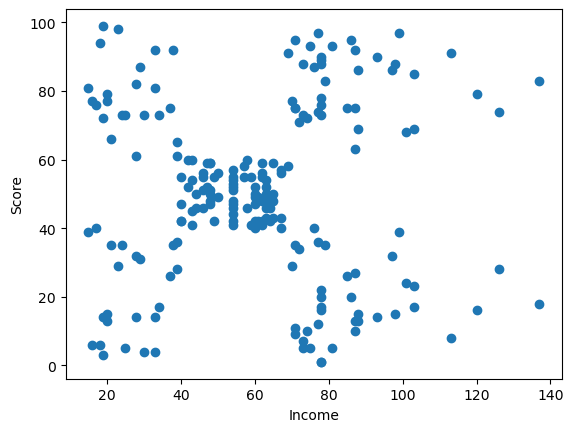

In [7]:
#plot Income with Score to identify the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['Income'],data['Score'])
plt.xlabel("Income")
plt.ylabel("Score")

In [13]:
#find the k value for divide dataset into clusters
from sklearn.cluster import KMeans
k_values=[1,2,3,4,5,6,7,8,9,10]
wcss_err_values=[]
for k in k_values:
    model=KMeans(n_clusters=k)   #assign k values one by one to the model 
    model.fit(data[['Income','Score']])   #give data to model for getting clusters
    wcss_err_values.append(model.inertia_)    #model.inertia = The WCSS value     

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [12]:
wcss_err_values # WCSS error values for different k values 

[269981.28,
 186687.04312531714,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37271.8862365895,
 33610.528526645765,
 25043.970949607217,
 21898.331946797163,
 20757.70958272993]

Text(0, 0.5, 'WCSS Value')

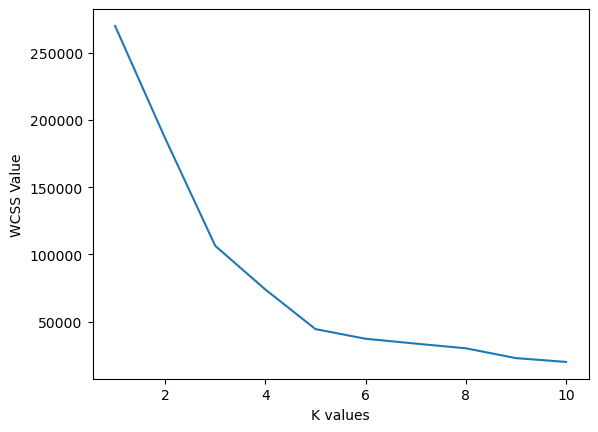

In [16]:
# Draw k values with their WCSS error value to get the highest anukramanya for getting best k value

plt.plot(k_values,wcss_err_values)
plt.xlabel("K values")
plt.ylabel("WCSS Value")     # We can get k=5 is the best value

In [18]:
# Then k=5,

from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
pred=model.fit_predict(data)    # get the predicted values with clusters
pred  # meke piliwelata row eken eka ema row eka adala wena class wena cluster ek dil thinv , Total clusters= 5 (0,1,2,3,4)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [19]:
data['Cluster_number']=pred
data.sample(5)

,Income,Score,Cluster_number
37,34,73,4
175,88,86,1
87,57,55,2
71,49,42,2
100,62,41,2


In [24]:
# data set eka clusters anuwa divede krgnnv 

c1=data[data['Cluster_number']==0]
c2=data[data['Cluster_number']==1]
c3=data[data['Cluster_number']==2]
c4=data[data['Cluster_number']==3]
c5=data[data['Cluster_number']==4]
c3.head(5)

,Income,Score,Cluster_number
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2


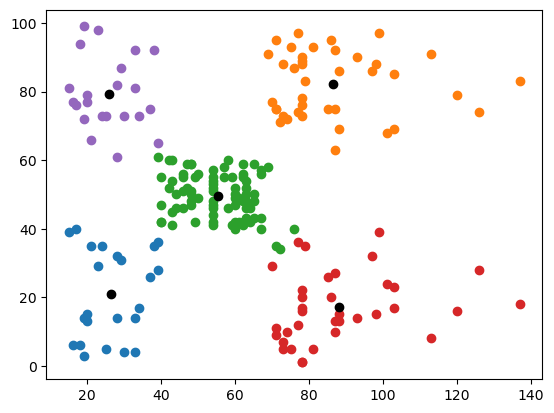

In [33]:
plt.scatter(c1['Income'],c1['Score'])
plt.scatter(c2['Income'],c2['Score'])
plt.scatter(c3['Income'],c3['Score'])
plt.scatter(c4['Income'],c4['Score'])
plt.scatter(c5['Income'],c5['Score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="black")

In [28]:
# get cluster center positions in 5 clusters

model.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])